In [5]:
import corr

from pathlib import Path

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import measure

In [6]:
pth = Path("../../data/low_movement/Experiment-746czi")
frame_paths = list(pth.glob("frame_*.tif"))
if not frame_paths:
    error_msg = f"No files found matching {pattern}"
    raise FileNotFoundError(error_msg)
frame_paths = [x.as_posix() for x in frame_paths]
frame_paths.sort()
frames = [np.array(Image.open(path)).astype(np.float32) for path in frame_paths]
frames = np.asarray(frames)
template_index = corr.find_highest_correlation(frames, plot=False)

In [79]:
# image type
image = frames[0]
print(image.dtype, image.min(), image.max())

float32 25.0 36662.0


In [80]:
min_val, max_val = image.min(), image.max()
img8 = ((image - min_val) / (max_val - min_val) * 255.0).astype(np.uint8)

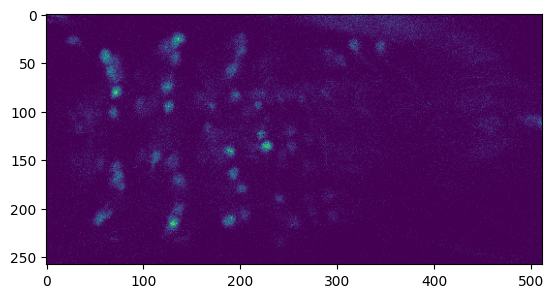

In [81]:
plt.imshow(img8)

0.0


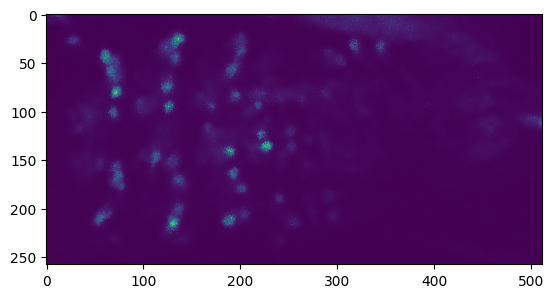

In [85]:
flat = img8.flatten()
median = np.median(flat)
sigma_n = 1.4826 * np.median(np.abs(flat - median))
print(sigma_n)
denoised = cv2.bilateralFilter(img8, d = 10, sigmaColor=20, sigmaSpace=50)
plt.imshow(denoised)

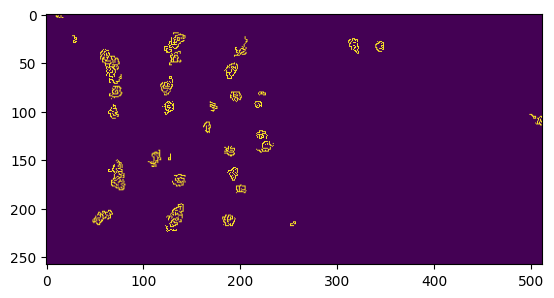

In [86]:
edges = cv2.Canny(denoised, 50, 150)
plt.imshow(edges)

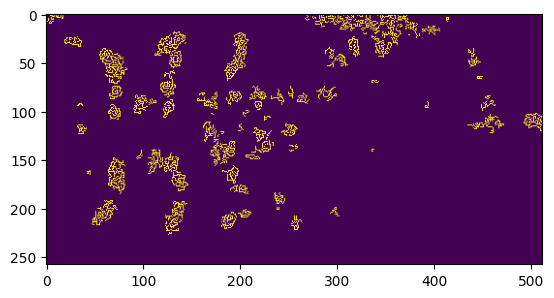

In [87]:

edges = cv2.Canny(img8, 50, 150)
plt.imshow(edges)

In [88]:
cv2_contours, hierarchy = cv2.findContours(edges,
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [89]:
cv2.drawContours(frames[0], contours, -1, (0, 255, 0), 3)
cv2.imshow('Contours', frames[0])

error: OpenCV(4.11.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2546: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


In [100]:
skimage_contours = measure.find_contours(denoised, level=((np.nanmin(denoised) + np.nanmax(denoised)) / 10))

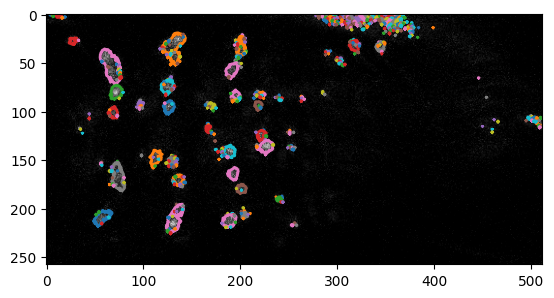

In [101]:
fig, ax = plt.subplots()
ax.imshow(frames[0], cmap=plt.cm.gray)

for contour in skimage_contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)